Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


585

***


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [37]:
import sklearn
sklearn.__version__

'1.1.2'

This function is to plot the confusion matrix.


In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


Load the data


In [ ]:
data = pd.read_csv("../eda/dataset_part/_2.csv")


In [ ]:
X = pd.read_csv('./dataset_part_3.csv')

In [6]:
Y = data["Class"].to_numpy()
Y.shape

(90,)

### Preprocessing:

In [7]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

## Testing and evaluating models:
Iam gonna actually try:
- Logistic Regression
- Support Vector Classifier
- Gradient boosting or random forest
- K-Nearest Neighbors

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Logistic Regression with GridSearchCV to fine tune it.

In [283]:
def LR_Grid_Search_CV(x, y):
    from sklearn.linear_model import LogisticRegression      # the model
    from sklearn.model_selection import GridSearchCV         # Hypertuning
    
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    lr = LogisticRegression()
    parameters = {'C': [0.001, 0.01, 0.1, 1, 0.03, 0.3, 3],
             'penalty': ['l2'],
             'solver': ['lbfgs']}
    clf = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)
    clf.fit(X_train, Y_train)
    yhat = clf.predict(X_test)
    return yhat, clf


In [284]:
%%time
lr_y_pred, lr_clf = Grid_Search_CV_LR(X, Y)

CPU times: user 257 ms, sys: 0 ns, total: 257 ms
Wall time: 257 ms


In [11]:
print("Linear Regression train score: %.2f" % lr_clf.best_score_)

Linear Regression train score: 0.82


### Support Vector Classifier with GridSearchCV to fine tune it.

In [ ]:
def SVC_Grid_Search_CV(x, y):
    from sklearn.svm import SVC                          # Support Vector Classifier model
    from sklearn.model_selection import GridSearchCV     # Hypertuning
    
    
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
                  'C': np.logspace(-3, 3, 5),
                  'gamma':np.logspace(-3, 3, 5)}
    svm = SVC(probability=True)
    clf = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)
    clf.fit(X_train, Y_train)
    yhat = clf.predict(X_test)
    return yhat, clf

In [108]:
%%time
svm_y_pred, svm_clf =  SVC_Grid_Search_CV(X, Y)

CPU times: user 2.43 s, sys: 3.9 ms, total: 2.44 s
Wall time: 2.44 s


In [285]:
svm_clf.best_params_

{'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}

In [109]:
print("SVC train score: %.2f" % svm_clf.best_score_)

SVC train score: 0.83


### Gradient Boosting with GridSearchCV:

In [15]:
def GBC_GridSearchCV(x, y):
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.model_selection import GridSearchCV
    
    
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    parameters = {'n_estimators': range(5, 100, 5),
                  'max_depth': range(5, 9, 1),
                  'max_features': [0.1, 'sqrt', 0.2],
                  'learning_rate': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3],
                 }

    gbc = GradientBoostingClassifier()
    clf = GridSearchCV(estimator=gbc, param_grid=parameters, cv=6)
    clf.fit(X_train, Y_train)
    yhat = clf.predict(X_test)
    return yhat, clf

In [18]:
%%time
gbc_yhat, gbc_clf = GBC_GridSearchCV(X, Y)

CPU times: user 5min 46s, sys: 243 ms, total: 5min 46s
Wall time: 5min 46s


In [36]:
import joblib

pickle.dump(gbc_clf, open("gbc.sav", 'wb'))

In [29]:
import pickle

In [19]:
print("GBC train score: %.2f" % gbc_clf.best_score_)

GBC train score: 0.88


### K-Nearest Neighbors Classifier

In [20]:
def KNN_GridSearchCV(x, y):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import GridSearchCV

    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': [1,2]}
    
    knn = KNeighborsClassifier()
    clf = GridSearchCV(estimator=knn, param_grid=parameters, cv=10)
    clf.fit(X_train, Y_train)
    yhat = clf.predict(X_test)
    return yhat, clf

In [21]:
%%time
knn_yhat, knn_clf = KNN_GridSearchCV(X, Y)


CPU times: user 41.2 s, sys: 1.14 s, total: 42.3 s
Wall time: 4.6 s


In [22]:
print("KNN train score: %.2f" % knn_clf.best_score_)

KNN train score: 0.84


We can see that:
- Logistic Regression took less time, but 81% accuracy in training data.
- While Gradient Boosting took the most, but 88% accuracy in the training data.
But anyway the accuracy is not everything specially with the training data :).

Next we are gonna evaluate the model with some metrics like __f-score__, __precision__, __recall__, __accuracy__, __AUC__.

### Evaluation:

In [90]:
# import accuracy, percision, recall and f1-score metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report       # print the classification summary 
                                                        # Precision, Recall, F1

__Some functions to help us plotting roc curve__

In [253]:
def plot_roc_curve(fpr, tpr, name, score):
    fig, ax = plt.subplots()
    plt.title(f"ROC Curve for {name}")
    ax.plot(fpr, tpr, label=f"{name} AUC = %.2f" % score)
    plt.xlabel("Precision (False Positive Rate)")
    plt.ylabel("Recall (True Positive Rate)")
    ax.legend(loc=4)
    plt.show()
    
def plot_all_roc(fprs=[], tprs=[], names=[], scores=[]):
    fig, ax = plt.subplots()
    plt.title("Comparing ROC Curve for all models")
    for fpr, tpr, name, score in zip(fprs, tprs, names, scores):
        plot = ax.plot(fpr, tpr, label=f"{name} AUC = %.2f" % score)
        if score == max(scores):
            ax.fill_between(fpr, tpr, alpha=0.2, color=plot[0].get_color())
    plt.xlabel("Precision (False Positive Rate)")
    plt.ylabel("Recall (True Positive Rate)")
    ax.legend(loc=4)
    plt.show()
    
def print_accuricies(scores, names):
    for score, name in zip(scores, names):
        print(f"{name} accuracy: %.2f" % score)

__Logistic Regression__


In [281]:
# Accuracy
lr_acc = accuracy_score(Y_test, lr_y_pred)
lr_scores = precision_recall_fscore_support(Y_test, lr_y_pred)
lr_precision = lr_scores[0][1]
lr_recall = lr_scores[1][1]
lr_f1 = lr_scores[2][1]
lr_summary = classification_report(Y_test, lr_y_pred, target_names=["didn't land", "landed"])
print("Logistic Regression Accuracy: %.2f" % lr_accuracy)

Logistic Regression Accuracy: 0.94


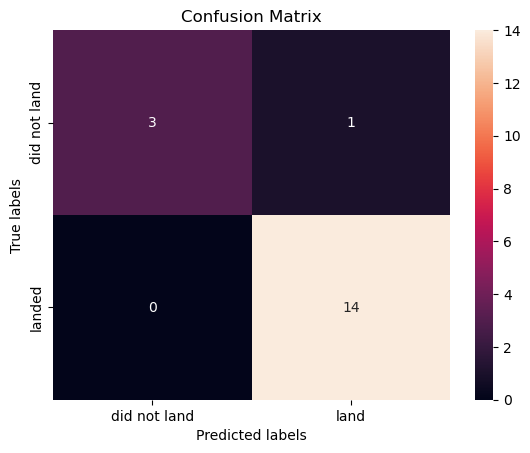

In [65]:
# Confusion Matrix
plot_confusion_matrix(Y_test, lr_y_pred)

precision: nsbt ele land mn ele ana 2olt 3lehom hylando 14/15

recall: nsbt ele ana 2olt hyland lle f3ln land 14/14

we see that logistic regression can distinguish between the different classes.  We see that it successfully labeled all of the landed ones.

So, We are gonna calculate the precision and recall and f1 score to get more infos about the model performance.

In [211]:
print(lr_summary)

              precision    recall  f1-score   support

 didn't land       1.00      0.75      0.86         4
      landed       0.93      1.00      0.97        14

    accuracy                           0.94        18
   macro avg       0.97      0.88      0.91        18
weighted avg       0.95      0.94      0.94        18



A good scores actually 93% percision with 100% recall.

In [231]:
lr_prob = lr_clf.predict_proba(X_test)
lr_auc = roc_auc_score(Y_test, lr_prob[:,1])
lr_fpr, lr_tpr, threshold = roc_curve(Y_test, lr_prob[:,1])

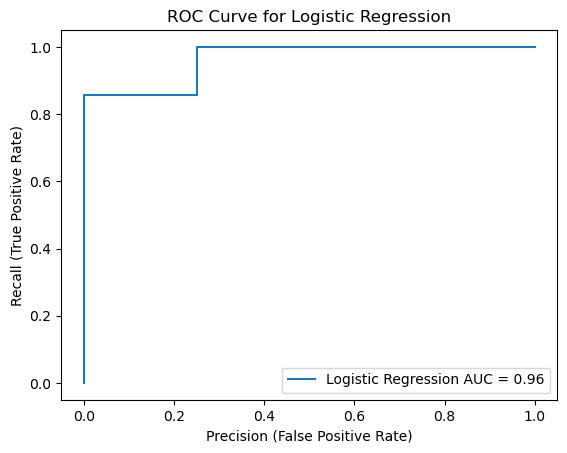

In [282]:
plot_roc_curve(lr_fpr, lr_tpr, "Logistic Regression", lr_auc)


A good area under curve.

__Support Vector Classifier__

In [270]:
# Accuracy
svm_acc = accuracy_score(Y_test, svm_y_pred)
svm_scores = precision_recall_fscore_support(Y_test, svm_y_pred)
svm_percision = svm_scores[0][1]
svm_recall = svm_scores[1][1]
svm_f1 = svm_scores[2][1]
svm_summary = classification_report(Y_test, svm_y_pred, target_names=["didn't land", "landed"])
print("SVM Accuracy: %.2f" % svm_accuracy)

SVM Accuracy: 0.89


__Lets plot the Confusion Matrix__

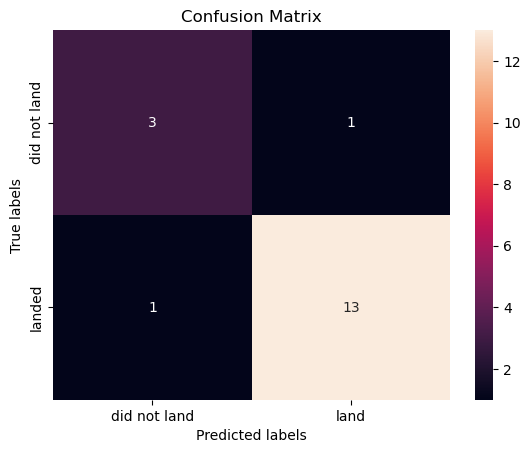

In [215]:
# Confusion Matrix
plot_confusion_matrix(Y_test, svm_y_pred)

In [216]:
print(svm_summary)

              precision    recall  f1-score   support

 didn't land       0.75      0.75      0.75         4
      landed       0.93      0.93      0.93        14

    accuracy                           0.89        18
   macro avg       0.84      0.84      0.84        18
weighted avg       0.89      0.89      0.89        18



We see it has an equal percision & recall which is 93% which is good.

In [217]:
svm_prob = svm_clf.predict_proba(X_test)
svm_auc = roc_auc_score(Y_test, svm_prob[:,1])
svm_fpr, svm_tpr, svm_thresholds = roc_curve(Y_test, svm_prob[:,1])

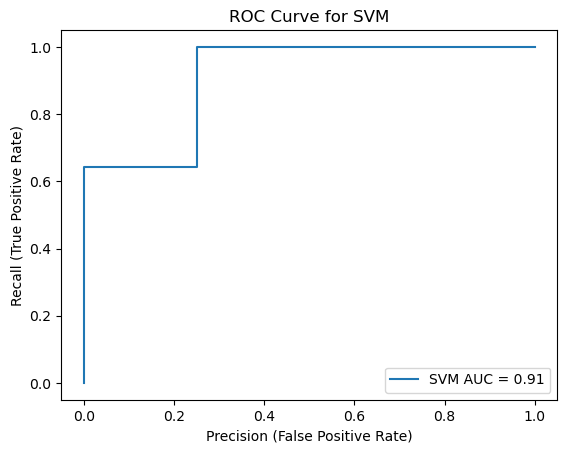

In [218]:
plot_roc_curve(svm_fpr, svm_tpr, "SVM", svm_auc)

0.91 AUC is good but not among our models.

#### __Gradient Boosting__

In [271]:
# Accuracy
gbc_acc = accuracy_score(Y_test, gbc_yhat)
gbc_scores = precision_recall_fscore_support(Y_test, gbc_yhat)
gbc_percision = gbc_scores[0][1]
gbc_recall = gbc_scores[1][1]
gbc_f1 = gbc_scores[2][1]
gbc_summary = classification_report(Y_test, gbc_yhat, target_names=["didn't land", "landed"])
print("GBC Accuracy: %.2f\n" % gbc_accuracy)

GBC Accuracy: 0.94



__Confusion Matrix__

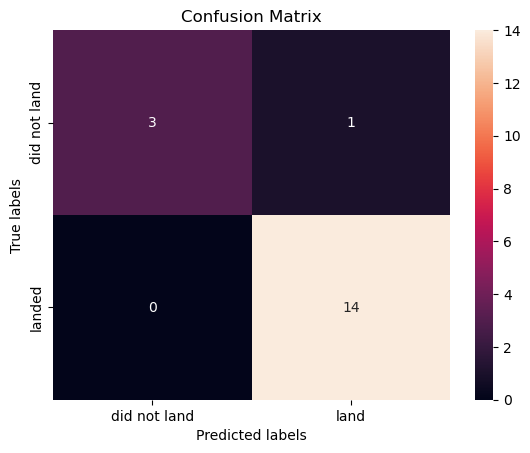

In [222]:
# Confusion Matrix
plot_confusion_matrix(Y_test, gbc_yhat)

In [189]:
print(gbc_summary)

              precision    recall  f1-score   support

 didn't land       1.00      0.75      0.86         4
      landed       0.93      1.00      0.97        14

    accuracy                           0.94        18
   macro avg       0.97      0.88      0.91        18
weighted avg       0.95      0.94      0.94        18



As we can see it is like linear regression

__ROC Curve and the area under it__

In [223]:
gbc_prob = gbc_clf.predict_proba(X_test)
gbc_auc = roc_auc_score(Y_test, gbc_prob[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(Y_test, gbc_prob[:,1])

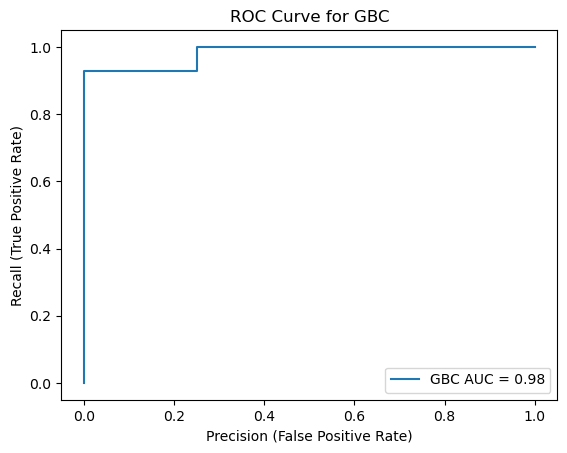

In [224]:
plot_roc_curve(gbc_fpr, gbc_tpr, "GBC", gbc_auc)

It has the largest auc, But let's look at knn maybe it is good too, I mean Gradient boosting took alot or time training and it is a con.

__KNN__

In [272]:
# Accuracy
knn_acc = accuracy_score(Y_test, knn_yhat)
knn_scores = precision_recall_fscore_support(Y_test, knn_yhat)
knn_percision = knn_scores[0][1]
knn_recall = knn_scores[1][1]
knn_f1 = knn_scores[2][1]
knn_summary = classification_report(Y_test, knn_yhat, target_names=['didn\'t land', 'landed'])
print("KNN Accuracy: %.2f" % knn_accuracy)

KNN Accuracy: 0.94


Same accuracy as Gradient Boosting, I guess it will have the same percision, recall and f1 :).

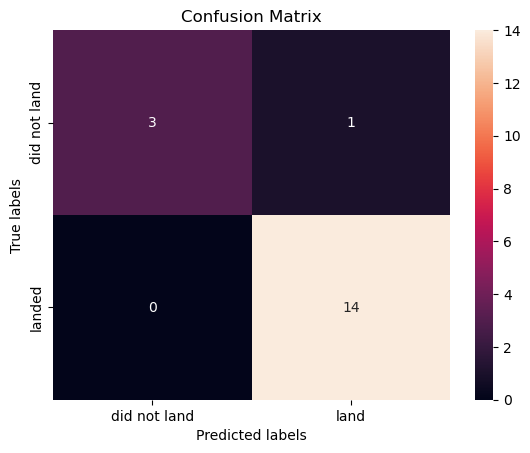

In [226]:
plot_confusion_matrix(Y_test, knn_yhat)

In [227]:
print(knn_summary)

              precision    recall  f1-score   support

 didn't land       1.00      0.75      0.86         4
      landed       0.93      1.00      0.97        14

    accuracy                           0.94        18
   macro avg       0.97      0.88      0.91        18
weighted avg       0.95      0.94      0.94        18



Yep as I thought, now let's plot the roc curve.

__KNN ROC Curve__

In [228]:
knn_prob = knn_clf.predict_proba(X_test)
knn_auc = roc_auc_score(Y_test, knn_prob[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(Y_test, knn_prob[:,1])

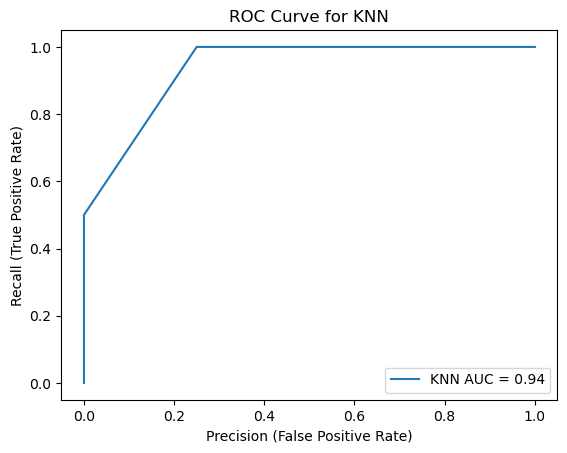

In [229]:
plot_roc_curve(knn_fpr, knn_tpr, "KNN", knn_auc)

It looks like gradient boosting have the largest area under curve as I thought.

### __Let's Summary this by comparing all of them__

- __Comparing training time__

- Logistic Regression took 253ms to train.
- Support Vector took 2.43s,
- Gradient boosting took 5m 46s, Which is too long comparing to the models above.
- K-nearest Neigbors took 41.3s.

We can confidently say that Linear Regression took the least time.

- __comparing accuricies__

In [252]:
names = ["LR", "SVM", "GBC", "KNN"]
scores = [lr_acc, svm_acc, gbc_acc, knn_acc]

In [288]:
print_accuricies(scores=scores, names=names)

LR accuracy: 0.96
SVM accuracy: 0.91
GBC accuracy: 0.98
KNN accuracy: 0.94


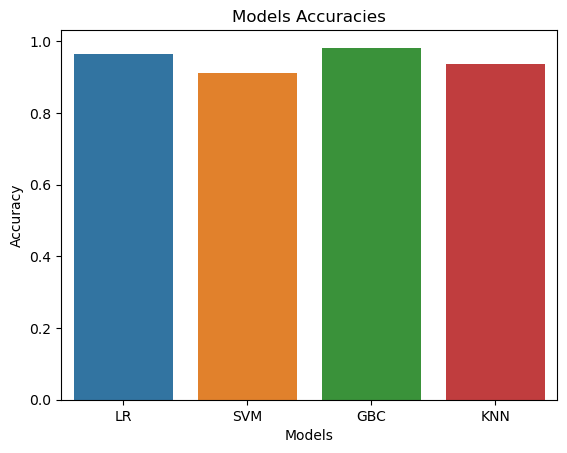

In [291]:
sns.barplot(x=names, y=scores)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Models Accuracies")
plt.show()

- We see that GBC, LR and KNN have the same accuracy 94%, But as we know accuracy is not everyting.
- SVM have the least accuracy percentage.

- __Percision, recall, f1 comparision__

In [278]:
def percision_recall(percisions: list, recalls: list, f1_scores: list, names: list):
    """
    printing the percisions, recalls, f1_score in table form
    :params
    percisions: list   models percisions
    recalls: list      models recalls
    f1_scores: list    models f1_score
    names: list        models names
    """
    
    print("     Percision   Recall     F1")
    for per, rec, f1, name in zip(percisions, recalls, f1_scores, names):
        if len(name) == 2:
            print(f"{name}:     %.2f      %.2f     %.2f" % (per, rec, f1))
        else:
            print(f"{name}:    %.2f      %.2f     %.2f" % (per, rec, f1))
            


percision_recall([lr_percision, svm_percision, gbc_percision, knn_percision], [lr_recall, svm_recall, gbc_recall, knn_recall], [lr_f1, svm_f1, gbc_f1, knn_f1], names)

     Percision   Recall     F1
LR:     0.93      1.00     0.97
SVM:    0.93      0.93     0.93
GBC:    0.93      1.00     0.97
KNN:    0.93      1.00     0.97


From the table above we can say that svm again is the odd one.

- __AUC with visuals__

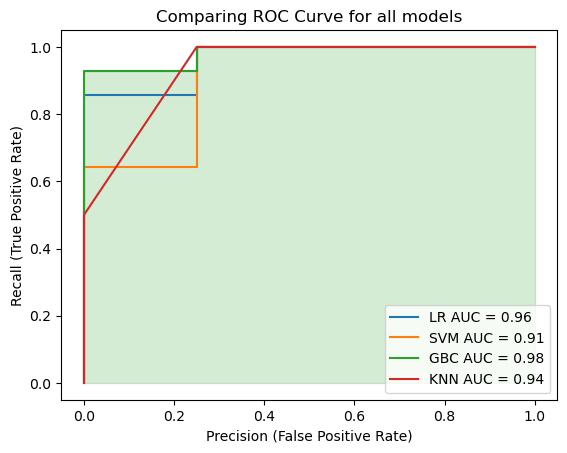

In [280]:
fprs = [lr_fpr, svm_fpr, gbc_fpr, knn_fpr]
tprs = [lr_tpr, svm_tpr, gbc_tpr, knn_tpr]
scores = [lr_auc, svm_auc, gbc_auc, knn_auc]
plot_all_roc(fprs=fprs, tprs=tprs, names=names, scores=scores)

- We see that GBC have the largest area under curve but as we said it took long time training.
- Now We can confidently say that SVM is excluded.

Based on the comparisions above we can say that __Logistic Regression__ is the best.

Because it took the least time training, It's AUC is good 0.96, It's percision, recall, f1-score and accuracy.

In [287]:
import pickle


pickle.dump(lr_clf, open("lr_model.sav", "wb"))

- 